In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess
sns.set_palette("rocket")
sns.set_style("dark")

In [80]:
stock_df = pd.read_csv("/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv",index_col="Date",parse_dates=True)
stock_df.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476


---

# EDA

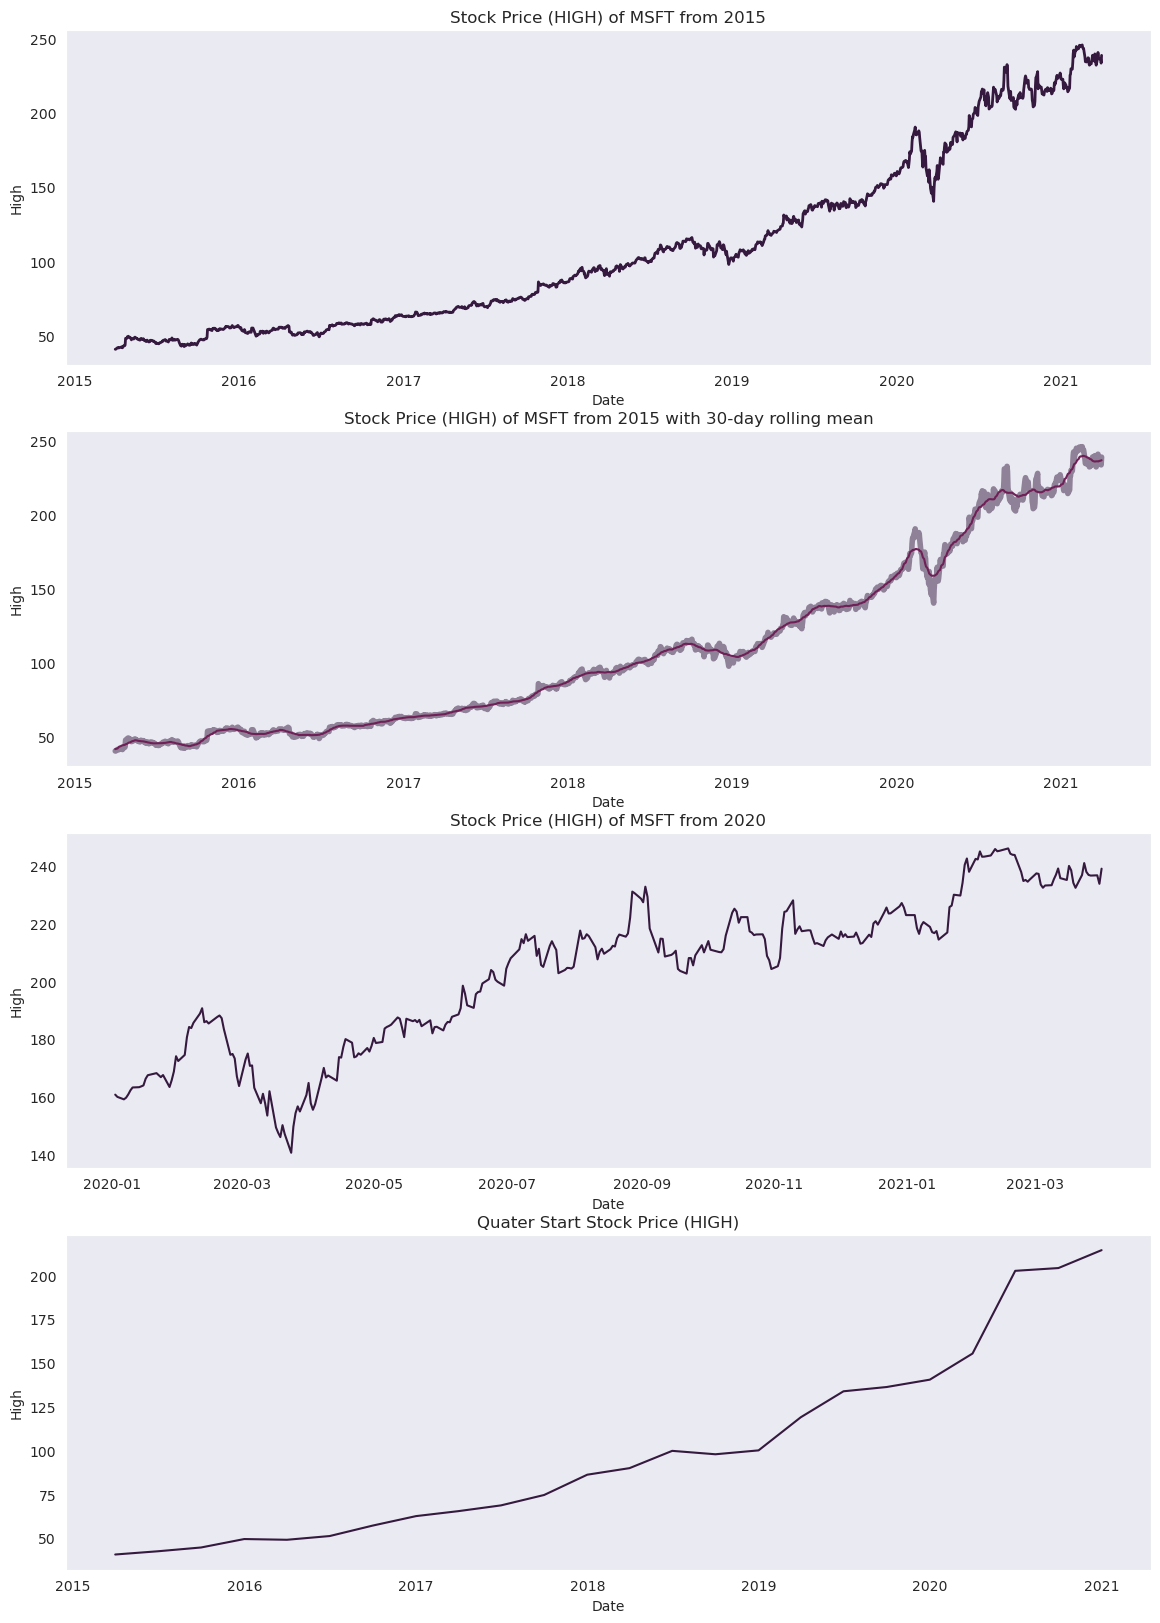

In [82]:
fig,axes = plt.subplots(4,1,figsize=(14,20))

plt.subplot(4,1,1)
sns.lineplot(stock_df["High"],linewidth=2)
plt.title("Stock Price (HIGH) of MSFT from 2015");

# Time Rolling
plt.subplot(4,1,2)
sns.lineplot(stock_df["High"],alpha=0.5,linewidth=4)
sns.lineplot(stock_df["High"].rolling(window=30,center=True,min_periods=15).mean(),palette="rocket")
plt.title("Stock Price (HIGH) of MSFT from 2015 with 30-day rolling mean");

# Limits to DateIndex
plt.subplot(4,1,3)
sns.lineplot(stock_df[stock_df.index>np.datetime64("2020-01-01")]["High"])
plt.title("Stock Price (HIGH) of MSFT from 2020");

# Time Resampling
plt.subplot(4,1,4)
sns.lineplot(stock_df.resample("QS").min()["High"])
plt.title("Quater Start Stock Price (HIGH)");

### 1. Simple Moving Average
### 2. Cumulative Moving Average
### 3. Exponential Weighted Moving Average
### 4. Moving Average (ACF)
### 5. Autogeneous Model (PACF)

In [100]:
# Simple Moving Average
df1 = pd.DataFrame()
df1["High"] = stock_df["High"]
df1["simpleMA"] = stock_df["High"].rolling(window=3).mean()
df1["simpleMA_center"] = stock_df["High"].rolling(window=3,center=True).mean()
df1["simpleMA_minPer=1"] = stock_df["High"].rolling(window=3,min_periods=1).mean()
df1["simpleMA_center_minPer=1"] = stock_df["High"].rolling(window=3,center=True,min_periods=1).mean()

df1.head()

,High,simpleMA,simpleMA_center,simpleMA_minPer=1,simpleMA_center_minPer=1
Date,,,,,
2015-04-01 16:00:00,40.76,NaN,NaN,40.760000,40.750000
2015-04-02 16:00:00,40.74,NaN,41.093333,40.750000,41.093333
2015-04-06 16:00:00,41.78,41.093333,41.476667,41.093333,41.476667
2015-04-07 16:00:00,41.91,41.476667,41.793333,41.476667,41.793333
2015-04-08 16:00:00,41.69,41.793333,41.740000,41.793333,41.740000


In [109]:
# Cumulative Moving Average
df2 = pd.DataFrame()
df2["High"] = stock_df["High"]
df2["cumlativeMA"] = stock_df["High"].expanding(min_periods=3).mean()

df2.head()

,High,cumlativeMA
Date,,
2015-04-01 16:00:00,40.76,NaN
2015-04-02 16:00:00,40.74,NaN
2015-04-06 16:00:00,41.78,41.093333
2015-04-07 16:00:00,41.91,41.297500
2015-04-08 16:00:00,41.69,41.376000


In [110]:
# Exponential Weighted Moving Average
df3 = pd.DataFrame()
df3["High"] = stock_df["High"]
# df3["cumlativeMA"] = stock_df["High"].expanding(min_periods=3).mean()

df3.head()

,High
Date,
2015-04-01 16:00:00,40.76
2015-04-02 16:00:00,40.74
2015-04-06 16:00:00,41.78
2015-04-07 16:00:00,41.91
2015-04-08 16:00:00,41.69
